<a href="https://colab.research.google.com/github/Nurfadilla159/Chabi-cakeshop/blob/main/uts_kecerdasanipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Online Shop Customer Sales Data.csv to Online Shop Customer Sales Data.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
df = pd.read_csv('Online Shop Customer Sales Data.csv')
print(df.head())

   Customer_id  Age  Gender  Revenue_Total  N_Purchases Purchase_DATE  \
0       504308   53       0           45.3            2      22.06.21   
1       504309   18       1           36.2            3      10.12.21   
2       504310   52       1           10.6            1      14.03.21   
3       504311   29       0           54.1            5      25.10.21   
4       504312   21       1           56.9            1      14.09.21   

   Purchase_VALUE  Pay_Method  Time_Spent  Browser  Newsletter  Voucher  
0          24.915           1         885        0           0        0  
1           2.896           2         656        0           0        1  
2          10.600           0         761        0           1        0  
3          43.280           1         906        0           1        0  
4          56.900           1         605        0           1        0  


In [ ]:
# Ubah tanggal
df['Purchase_DATE'] = pd.to_datetime(df['Purchase_DATE'], format='%d.%m.%y', errors='coerce')

# Hapus baris dengan nilai kosong
df.dropna(inplace=True)

# Pisahkan fitur dan target
X = df.drop(columns=['Customer_id', 'Revenue_Total', 'Purchase_DATE'])  # Fitur
y = df['Revenue_Total']  # Target

# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Bentuk data jadi 3D: [samples, timesteps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(1, X_scaled.shape[2])))
model.add(Dense(1))  # Output satu nilai

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         3,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,051 (11.92 KB)

 Trainable params: 3,051 (11.92 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/5
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 329.1455 - val_loss: 124.2101
Epoch 2/5
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 123.6473 - val_loss: 123.2116
Epoch 3/5
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 121.1945 - val_loss: 118.0468
Epoch 4/5
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 114.5495 - val_loss: 115.3810
Epoch 5/5
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 112.9634 - val_loss: 113.5173


In [ ]:
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error (MSE): {loss}")

412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 113.2295
Mean Squared Error (MSE): 113.51732635498047


In [ ]:
predictions = model.predict(X_test)

# Tampilkan 10 hasil prediksi pertama
for i in range(10):
    print(f"Prediksi: {predictions[i][0]:.2f} | Asli: {y_test.iloc[i]:.2f}")

412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Prediksi: 35.97 | Asli: 31.00
Prediksi: 31.29 | Asli: 30.10
Prediksi: 19.92 | Asli: 44.30
Prediksi: 32.15 | Asli: 22.50
Prediksi: 3.01 | Asli: 0.70
Prediksi: 16.98 | Asli: 3.10
Prediksi: 34.80 | Asli: 33.00
Prediksi: 34.67 | Asli: 58.50
Prediksi: 6.88 | Asli: 4.60
Prediksi: 38.00 | Asli: 38.10


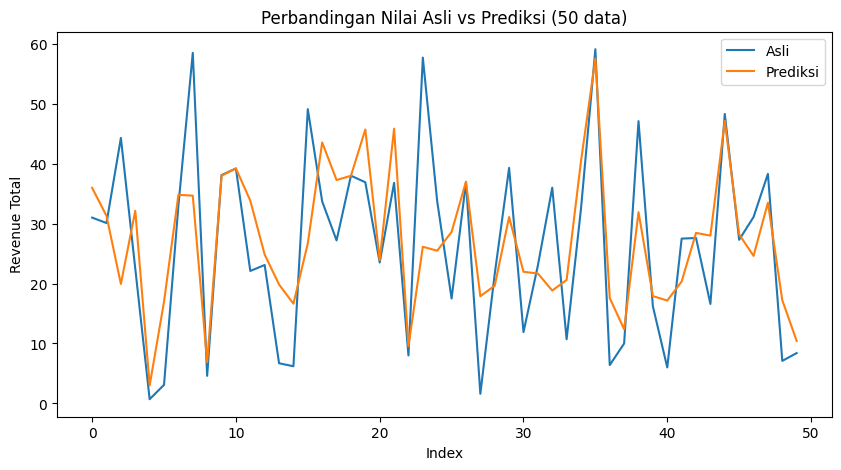

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label='Asli')
plt.plot(predictions[:50], label='Prediksi')
plt.title('Perbandingan Nilai Asli vs Prediksi (50 data)')
plt.xlabel('Index')
plt.ylabel('Revenue Total')
plt.legend()
plt.show()